In [11]:
import os
import nibabel as nib

# 文件夹路径
folder_path = '脑PET图像分析和疾病预测挑战赛公开数据/train/NC/'

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    if filename.endswith('.nii.gz') or filename.endswith('.nii'):
        nifti_file_path = os.path.join(folder_path, filename)

        # 读取NIfTI文件
        nifti_img = nib.load(nifti_file_path)

        # 获取图像数据的形状（长、宽维度）
        nifti_shape = nifti_img.shape[:2]  # 获取前两个维度（长、宽）

        # 打印文件名和形状
        print(f"File: {filename}, Shape: {nifti_shape}")




File: 1.nii, Shape: (128, 128)


In [26]:
import os
import nibabel as nib
from PIL import Image
import numpy as np

# 文件夹路径
folder_path = '脑PET图像分析和疾病预测挑战赛公开数据/test/'

# 创建保存切片的输出文件夹
output_folder = 'test/'
os.makedirs(output_folder, exist_ok=True)

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    if filename.endswith('.nii.gz') or filename.endswith('.nii'):
        nifti_file_path = os.path.join(folder_path, filename)

        # 读取NIfTI文件
        nifti_img = nib.load(nifti_file_path)

        # 获取图像数据和形状
        nifti_data = nifti_img.get_fdata()
        nifti_shape = nifti_data.shape

        # 获取切片数量
        num_slices = nifti_shape[2]

        # 计算要处理的切片范围
        start_slice = num_slices // 3
        end_slice = start_slice * 2

        # 遍历切片并进行处理
        for slice_index in range(start_slice, end_slice):
            # 提取单个切片
            single_slice = nifti_data[:, :, slice_index, 0]

            # 将切片数据规范化到0-255范围
            normalized_slice = ((single_slice - np.min(single_slice)) / (np.max(single_slice) - np.min(single_slice)) * 255).astype(np.uint8)

            # 将切片转换为PIL图像
            pil_image = Image.fromarray(normalized_slice)

            # 构造切片文件路径
            slice_filename = f"{filename.split('.')[0]}_slice_{slice_index}.png"
            slice_filepath = os.path.join(output_folder, slice_filename)

            # 保存切片为图像文件
            pil_image.save(slice_filepath)

            # 输出切片信息
            print(f"File: {filename}, Slice: {slice_index}, Shape: {single_slice.shape}")






File: 1.nii, Slice: 0, Shape: (128, 128)
File: 1.nii, Slice: 1, Shape: (128, 128)
File: 1.nii, Slice: 2, Shape: (128, 128)
File: 1.nii, Slice: 3, Shape: (128, 128)
File: 1.nii, Slice: 4, Shape: (128, 128)
File: 1.nii, Slice: 5, Shape: (128, 128)
File: 1.nii, Slice: 6, Shape: (128, 128)
File: 1.nii, Slice: 7, Shape: (128, 128)
File: 1.nii, Slice: 8, Shape: (128, 128)
File: 1.nii, Slice: 9, Shape: (128, 128)
File: 1.nii, Slice: 10, Shape: (128, 128)
File: 1.nii, Slice: 11, Shape: (128, 128)
File: 1.nii, Slice: 12, Shape: (128, 128)
File: 1.nii, Slice: 13, Shape: (128, 128)
File: 1.nii, Slice: 14, Shape: (128, 128)
File: 1.nii, Slice: 15, Shape: (128, 128)
File: 1.nii, Slice: 16, Shape: (128, 128)
File: 1.nii, Slice: 17, Shape: (128, 128)
File: 1.nii, Slice: 18, Shape: (128, 128)
File: 1.nii, Slice: 19, Shape: (128, 128)
File: 1.nii, Slice: 20, Shape: (128, 128)
File: 1.nii, Slice: 21, Shape: (128, 128)
File: 1.nii, Slice: 22, Shape: (128, 128)
File: 1.nii, Slice: 23, Shape: (128, 128)
Fi

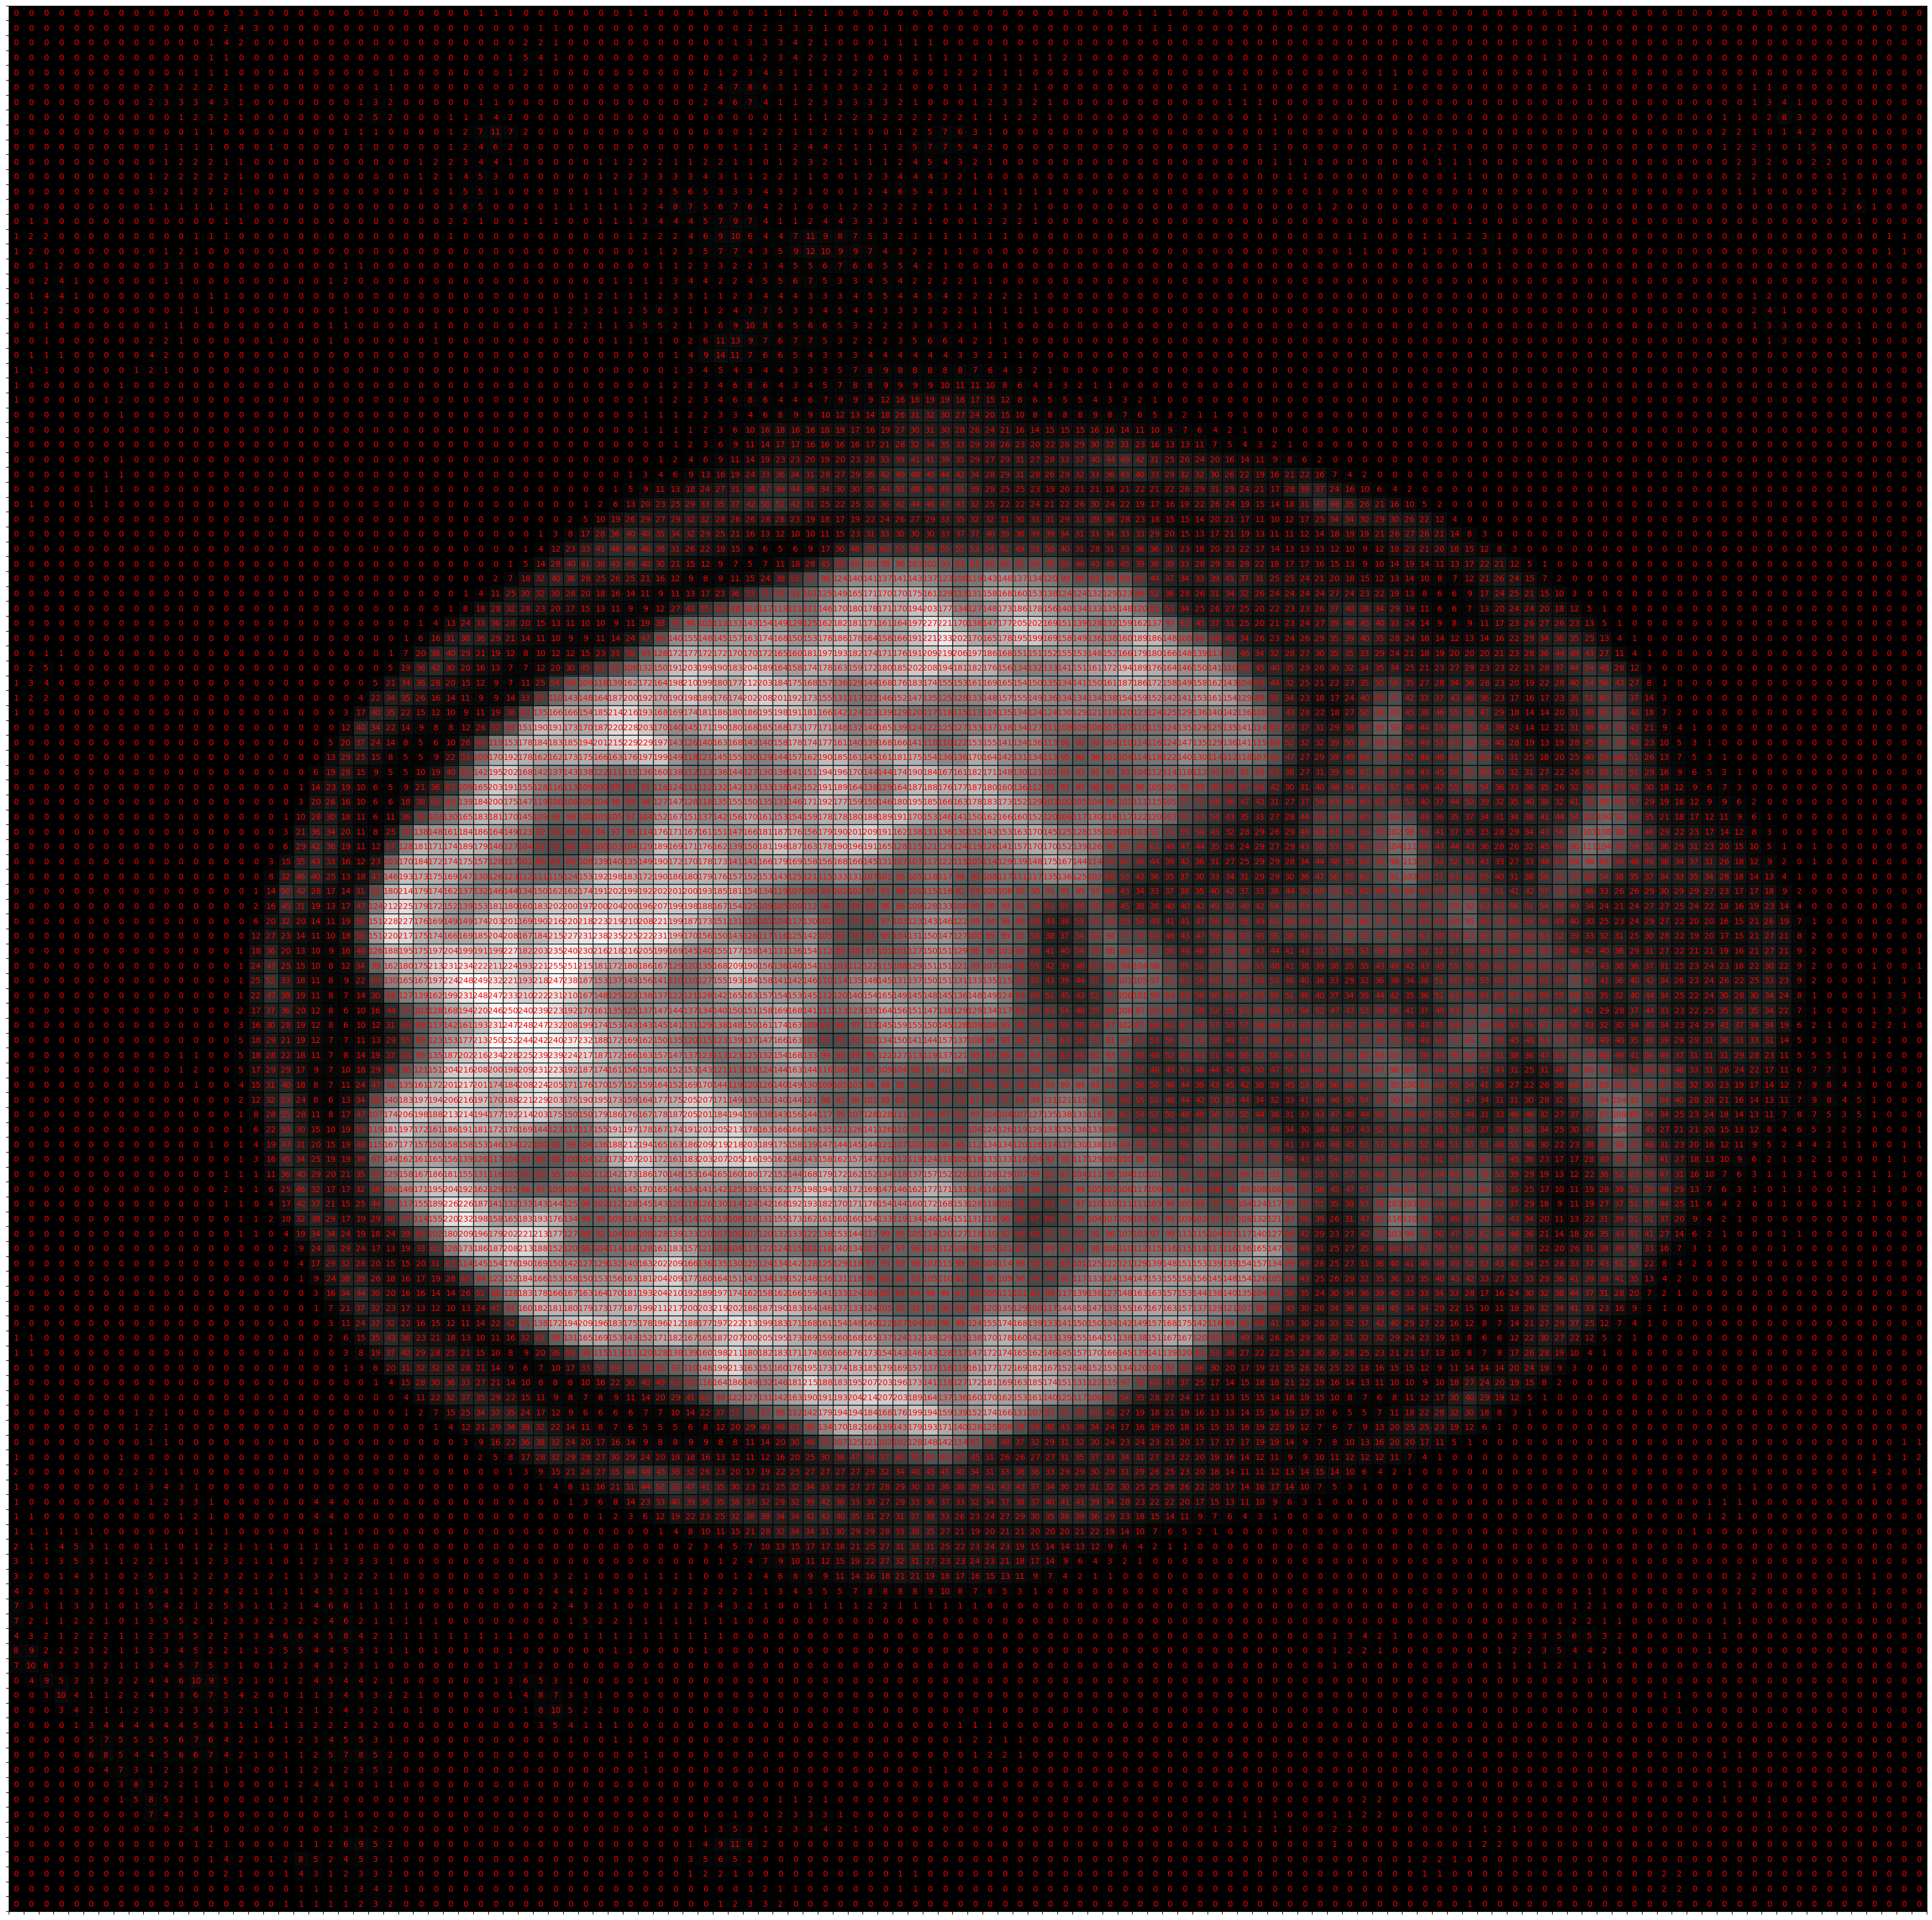

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 图像文件路径
image_path = 'output_slices/1_slice_25.png'  # 替换为实际的图像文件路径

# 打开图像
image = Image.open(image_path)

# 将图像转换为NumPy数组
image_array = np.array(image)

# 获取图像的宽度和高度
width, height = image_array.shape

# 创建网格图
plt.figure(figsize=(width / 3, height / 3))  # 调整图像大小

# 绘制网格图
plt.imshow(image_array, cmap='gray', aspect='auto')

# 添加网格线
plt.grid(True, which='both', color='black', linewidth=1)

# 显示像素值
for y in range(height):
    for x in range(width):
        plt.text(x, y, str(image_array[y, x]), color='red', ha='center', va='center')

# 显示坐标轴
plt.xticks(np.arange(-0.5, width, 1), [])
plt.yticks(np.arange(-0.5, height, 1), [])

# 显示网格图
plt.show()


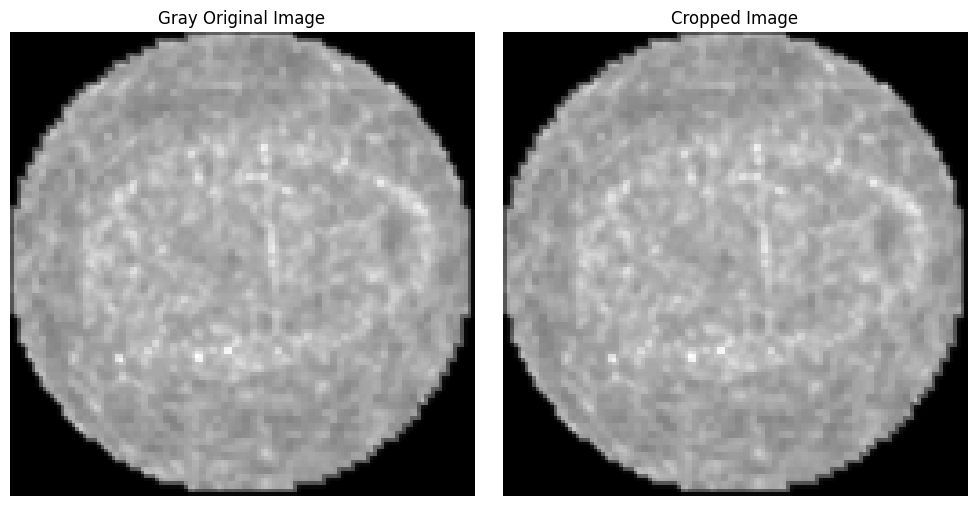

Final cropped image saved to final_cropped_image.png


In [50]:
import numpy as np
from PIL import Image

class ImageProcessor:
    def crop_2(self, img):
        dowm = img.shape[0]
        up = img.shape[1]
        max1 = max(dowm, up)
        dowm = (max1 - dowm) // 2
        up = (max1 - up) // 2
        dowm_zuo, dowm_you = dowm, dowm
        up_zuo, up_you = up, up
        if (max1 - img.shape[0]) % 2 != 0:
            dowm_zuo = dowm_zuo + 1
        if (max1 - img.shape[1]) % 2 != 0:
            up_zuo = up_zuo + 1
        matrix_pad = np.pad(img, pad_width=((dowm_zuo, dowm_you),
                                            (up_zuo, up_you))
                            , mode="constant",
                            constant_values=(0, 0))
        img = matrix_pad
        return img

    def crop_1(self, img_path):
        img = Image.open(img_path)
        img = np.array(img)
        index = np.where(img > 50)
        x = index[0]
        y = index[1]
        max_x = max(x)
        min_x = min(x)
        max_y = max(y)
        min_y = min(y)
        max_x = max_x + 10
        min_x = min_x - 10
        max_y = max_y + 10
        min_y = min_y - 10
        if max_x > img.shape[0]:
            max_x = img.shape[0]
        if min_x < 0:
            min_x = 0
        if max_y > img.shape[1]:
            max_y = img.shape[1]
        if min_y < 0:
            min_y = 0
        img = img[min_x:max_x, min_y:max_y]
        return self.crop_2(img)

# 创建ImageProcessor实例
processor = ImageProcessor()

# 图像文件路径
img_path = 'test/90_slice_24.png'  # 替换为实际的图像文件路径

# 打开原始图像
original_img = Image.open(img_path)

# 将原始图像转换为灰度图
gray_original_img = original_img.convert('L')

# 第一个裁剪步骤
cropped_img_1 = processor.crop_1(img_path)

# 第二个裁剪步骤
final_cropped_img = processor.crop_2(cropped_img_1)

# 创建画布
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 显示灰度原始图像
axes[0].imshow(gray_original_img, cmap='gray')
axes[0].set_title("Gray Original Image")
axes[0].axis('off')  # 不显示坐标轴

# 显示裁剪图像
axes[1].imshow(final_cropped_img, cmap='gray')
axes[1].set_title("Cropped Image")
axes[1].axis('off')  # 不显示坐标轴

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

# 保存图像
output_path = 'final_cropped_image.png'
final_cropped_pil_img = Image.fromarray(final_cropped_img)
final_cropped_pil_img.save(output_path)
print(f"Final cropped image saved to {output_path}")


In [53]:
import numpy as np
from PIL import Image

class ImageProcessor:
    def crop_2(self, img):
        dowm = img.shape[0]
        up = img.shape[1]
        max1 = max(dowm, up)
        dowm = (max1 - dowm) // 2
        up = (max1 - up) // 2
        dowm_zuo, dowm_you = dowm, dowm
        up_zuo, up_you = up, up
        if (max1 - img.shape[0]) % 2 != 0:
            dowm_zuo = dowm_zuo + 1
        if (max1 - img.shape[1]) % 2 != 0:
            up_zuo = up_zuo + 1
        matrix_pad = np.pad(img, pad_width=((dowm_zuo, dowm_you),
                                            (up_zuo, up_you))
                            , mode="constant",
                            constant_values=(0, 0))
        img = matrix_pad
        return img

    def crop_1(self, img_path):
        img = Image.open(img_path)
        img = np.array(img)
        index = np.where(img > 50)
        x = index[0]
        y = index[1]
        max_x = max(x)
        min_x = min(x)
        max_y = max(y)
        min_y = min(y)
        max_x = max_x + 10
        min_x = min_x - 10
        max_y = max_y + 10
        min_y = min_y - 10
        if max_x > img.shape[0]:
            max_x = img.shape[0]
        if min_x < 0:
            min_x = 0
        if max_y > img.shape[1]:
            max_y = img.shape[1]
        if min_y < 0:
            min_y = 0
        img = img[min_x:max_x, min_y:max_y]
        return self.crop_2(img)

# 创建ImageProcessor实例
processor = ImageProcessor()

# 图像文件夹路径
folder_path = 'test'  # 替换为实际的图像文件夹路径

# 创建保存结果的文件夹
output_folder = '脑PET图像分析和疾病预测挑战赛公开数据/ctest'
os.makedirs(output_folder, exist_ok=True)

# 遍历图像文件夹中的所有图像
for filename in os.listdir(folder_path):
    if filename.lower().endswith('.png') or filename.lower().endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)

        # 打开原始图像
        original_img = Image.open(img_path)

        # 第一个裁剪步骤
        cropped_img_1 = processor.crop_1(img_path)

        # 第二个裁剪步骤
        final_cropped_img = processor.crop_2(cropped_img_1)

        # 保存裁剪图像
        output_path = os.path.join(output_folder, f'cropped_{filename}')
        final_cropped_pil_img = Image.fromarray(final_cropped_img)
        final_cropped_pil_img.save(output_path)
        print(f"Final cropped image saved to {output_path}")

Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_0.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_1.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_10.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_11.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_12.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_13.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_14.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_15.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_16.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_17.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_18.png
Final cropped image saved to 脑PET图像分析和疾病预测挑战赛公开数据/ctest\cropped_100_slice_19.png
Final cropped image saved to 脑